In [2]:
import os
from glob import glob
from PIL import Image
import numpy as np
import faiss
from sentence_transformers import SentenceTransformer
import matplotlib.pyplot as plt
import random

e:\AIC-2024\AIC-2024\venv\lib\site-packages\sentence_transformers\cross_encoder\CrossEncoder.py:11: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from tqdm.autonotebook import tqdm, trange


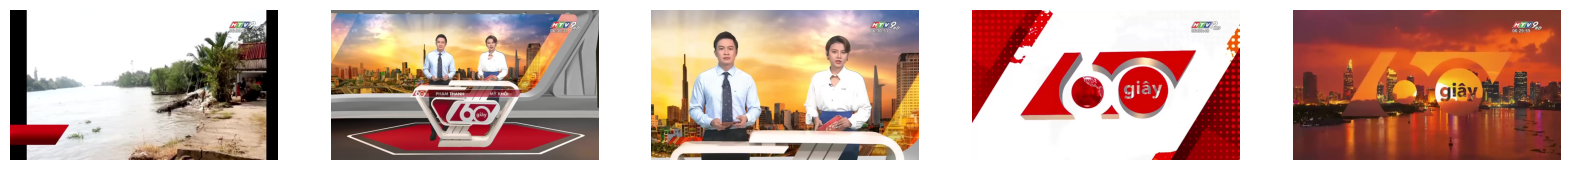

In [13]:
image_folder = "../webapp/static/video/"

image_files = glob(os.path.join(image_folder, "*.jpg"))

selected_files = random.sample(image_files, 5)

plt.figure(figsize=(20, 5))

for i, file in enumerate(selected_files):
    image = Image.open(file)
    plt.subplot(1, 5, i+1)
    plt.imshow(image)
    plt.axis("off")
        
plt.show()

In [ ]:
model = SentenceTransformer('clip-ViT-B-32')
image_path = ""

image_files = glob(os.path.join(image_folder, "*.jpg"))
chunk_size = 256
embeddings = []

def process_chunk(chunk):
    images = []
    for image_files in chunk:
        images.append(Image.open(image_files))
        
    chunk_embeddings = model.encode(images)
    return chunk_embeddings

for i in range(0, len(image_files), chunk_size):
    print(i)
    chunk = image_files[i+1 + chunk_size]
    embeddings.extend(process_chunk(chunk))